In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'seaborn'

In [3]:
# Load the dataset
aqi_data = pd.read_csv('/Users/pandhari/AQI-Prediction-Delhi/data/weather.csv' , parse_dates=["datetime"] , index_col="datetime")  # Replace with your actual CSV path


In [5]:
# Check the first few rows of the dataset
aqi_data.head()


,name,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,...,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
datetime,,,,,,,,,,,,,,,,,,,,,
01-01-2015,delhi,21.0,9.0,14.4,10.6,80.1,9.4,10.9,1017.0,58.9,...,36.39,110.59,33.85,14.31,10.34,41.68,13.47,24.86,472.0,Severe
02-01-2015,delhi,15.5,12.0,14.2,12.8,91.1,11.2,95.6,1018.0,81.4,...,32.87,88.14,31.83,8.07,8.17,29.97,10.32,20.09,454.0,Severe
03-01-2015,delhi,17.0,13.0,14.8,13.5,92.0,9.4,303.9,1017.3,92.9,...,30.31,47.95,69.55,7.84,2.30,19.71,3.67,10.23,143.0,Moderate
04-01-2015,delhi,18.0,10.0,13.8,10.9,84.1,16.6,296.7,1019.2,46.5,...,36.91,48.62,130.36,9.64,5.19,25.36,4.28,9.71,319.0,Very Poor
05-01-2015,delhi,20.5,8.0,13.1,8.5,75.8,26.6,288.5,1016.3,12.7,...,34.92,38.25,122.88,6.69,3.71,23.20,3.08,6.21,325.0,Very Poor


In [6]:
aqi_data.shape

(1927, 27)

In [7]:
aqi_data["PM2.5"].describe()

count    1925.000000
mean      118.026686
std        81.234594
min        10.340000
25%        59.280000
50%        96.890000
75%       154.260000
max       685.360000
Name: PM2.5, dtype: float64

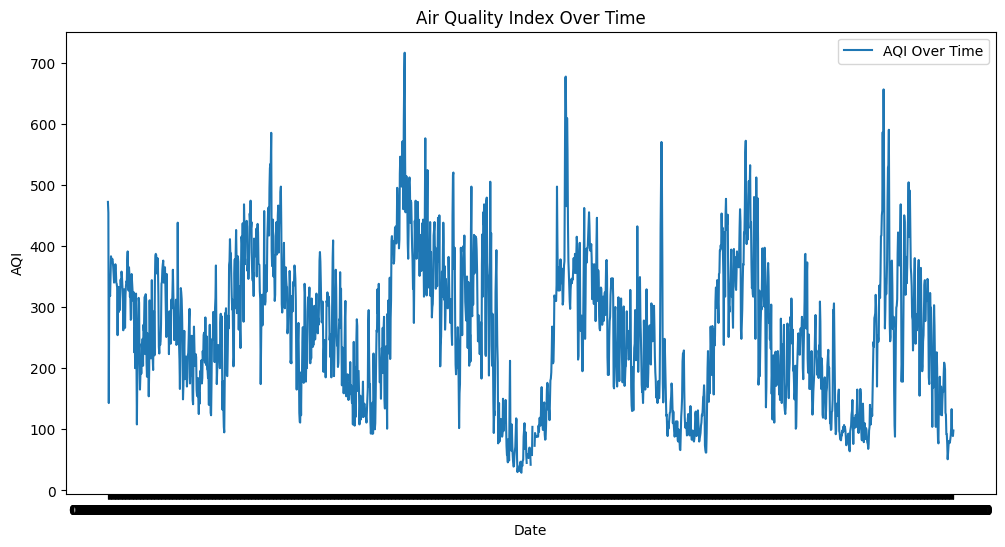

In [8]:
import matplotlib.pyplot as plt

# Plotting AQI over time
plt.figure(figsize=(12, 6))
plt.plot(aqi_data['AQI'], label='AQI Over Time')
plt.title('Air Quality Index Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [9]:
# # 7-day moving average
# aqi_data['AQI_7D_MA'] = aqi_data['AQI'].rolling(window=7).mean()

# # Plotting AQI with its moving average
# plt.figure(figsize=(12, 6))
# plt.plot(aqi_data['AQI'], label='Daily AQI')
# plt.plot(aqi_data['AQI_7D_MA'], label='7-Day Moving Average', color='red')
# plt.legend()
# plt.show()

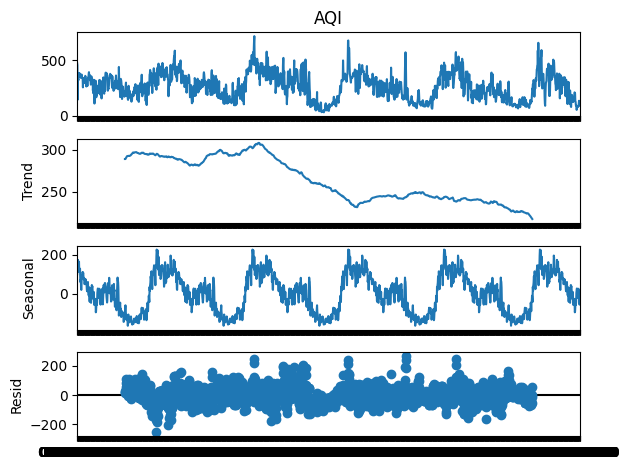

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose AQI into trend, seasonal, and residual components
decomposition = seasonal_decompose(aqi_data['AQI'].dropna(), model='additive', period=365)

# Plot the decomposition
decomposition.plot()
plt.show()

In [43]:
# Check for missing values
missing_values = aqi_data.isnull().sum()
print(missing_values)


tempmax              0
tempmin              0
temp                 0
dew                  0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
PM2.5                0
PM10                 0
NO                   2
NO2                  2
NOx                  0
NH3                  9
CO                   0
SO2                  0
O3                   0
Benzene              0
Toluene              0
AQI                 10
dtype: int64


In [12]:
# Check missing values for PM2.5
aqi_data['PM2.5'].isnull().sum()


2

In [13]:
# Fill missing values with the median of PM2.5
aqi_data['PM2.5'].fillna(aqi_data['PM2.5'].median(), inplace=True)


/var/folders/42/94lj0cp519ncj7_m79j3_h3m0000gn/T/ipykernel_1220/3778230720.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aqi_data['PM2.5'].fillna(aqi_data['PM2.5'].median(), inplace=True)


In [14]:
aqi_data['PM2.5'].isnull().sum()

0

In [30]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1927 entries, 01-01-2015 to 10-04-2020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           1927 non-null   float64
 1   tempmin           1927 non-null   float64
 2   temp              1927 non-null   float64
 3   dew               1927 non-null   float64
 4   winddir           1927 non-null   float64
 5   sealevelpressure  1927 non-null   float64
 6   cloudcover        1927 non-null   float64
 7   visibility        1927 non-null   float64
 8   PM2.5             1927 non-null   float64
 9   PM10              1850 non-null   float64
 10  NO                1925 non-null   float64
 11  NO2               1925 non-null   float64
 12  NOx               1927 non-null   float64
 13  NH3               1918 non-null   float64
 14  CO                1927 non-null   float64
 15  SO2               1927 non-null   float64
 16  O3                1843 non-null 

### Removed name column as it contains only Delhi

In [16]:
aqi_data['name'].value_counts()

name
delhi    1927
Name: count, dtype: int64

In [17]:
aqi_data["AQI_Bucket"].value_counts()

AQI_Bucket
Poor            542
Very Poor       512
Moderate        457
Severe          231
Satisfactory    154
Good             21
Name: count, dtype: int64

### Distribution of AQI_Bucket with AQI

/var/folders/42/94lj0cp519ncj7_m79j3_h3m0000gn/T/ipykernel_1220/212135371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AQI_Bucket', y='AQI', data=aqi_data, palette='coolwarm')


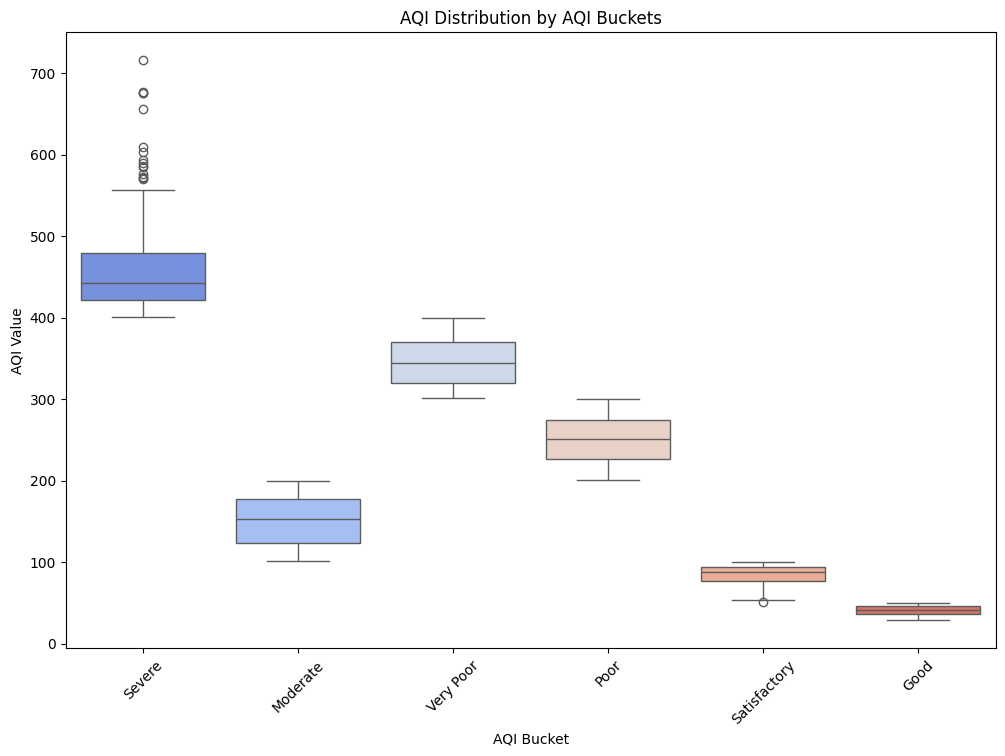

In [18]:
# Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='AQI_Bucket', y='AQI', data=aqi_data, palette='coolwarm')

# Customization
plt.title('AQI Distribution by AQI Buckets')
plt.xlabel('AQI Bucket')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)

# Show plot
plt.show()

In [19]:
aqi_data = aqi_data.drop(columns=["name" , "AQI_Bucket"] , axis=1)

In [20]:
aqi_data.head(5)

,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,...,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
datetime,,,,,,,,,,,,,,,,,,,,,
01-01-2015,21.0,9.0,14.4,10.6,80.1,9.4,10.9,1017.0,58.9,0.7,...,69.16,36.39,110.59,33.85,14.31,10.34,41.68,13.47,24.86,472.0
02-01-2015,15.5,12.0,14.2,12.8,91.1,11.2,95.6,1018.0,81.4,1.4,...,62.09,32.87,88.14,31.83,8.07,8.17,29.97,10.32,20.09,454.0
03-01-2015,17.0,13.0,14.8,13.5,92.0,9.4,303.9,1017.3,92.9,0.9,...,25.73,30.31,47.95,69.55,7.84,2.30,19.71,3.67,10.23,143.0
04-01-2015,18.0,10.0,13.8,10.9,84.1,16.6,296.7,1019.2,46.5,0.8,...,25.01,36.91,48.62,130.36,9.64,5.19,25.36,4.28,9.71,319.0
05-01-2015,20.5,8.0,13.1,8.5,75.8,26.6,288.5,1016.3,12.7,1.6,...,14.01,34.92,38.25,122.88,6.69,3.71,23.20,3.08,6.21,325.0


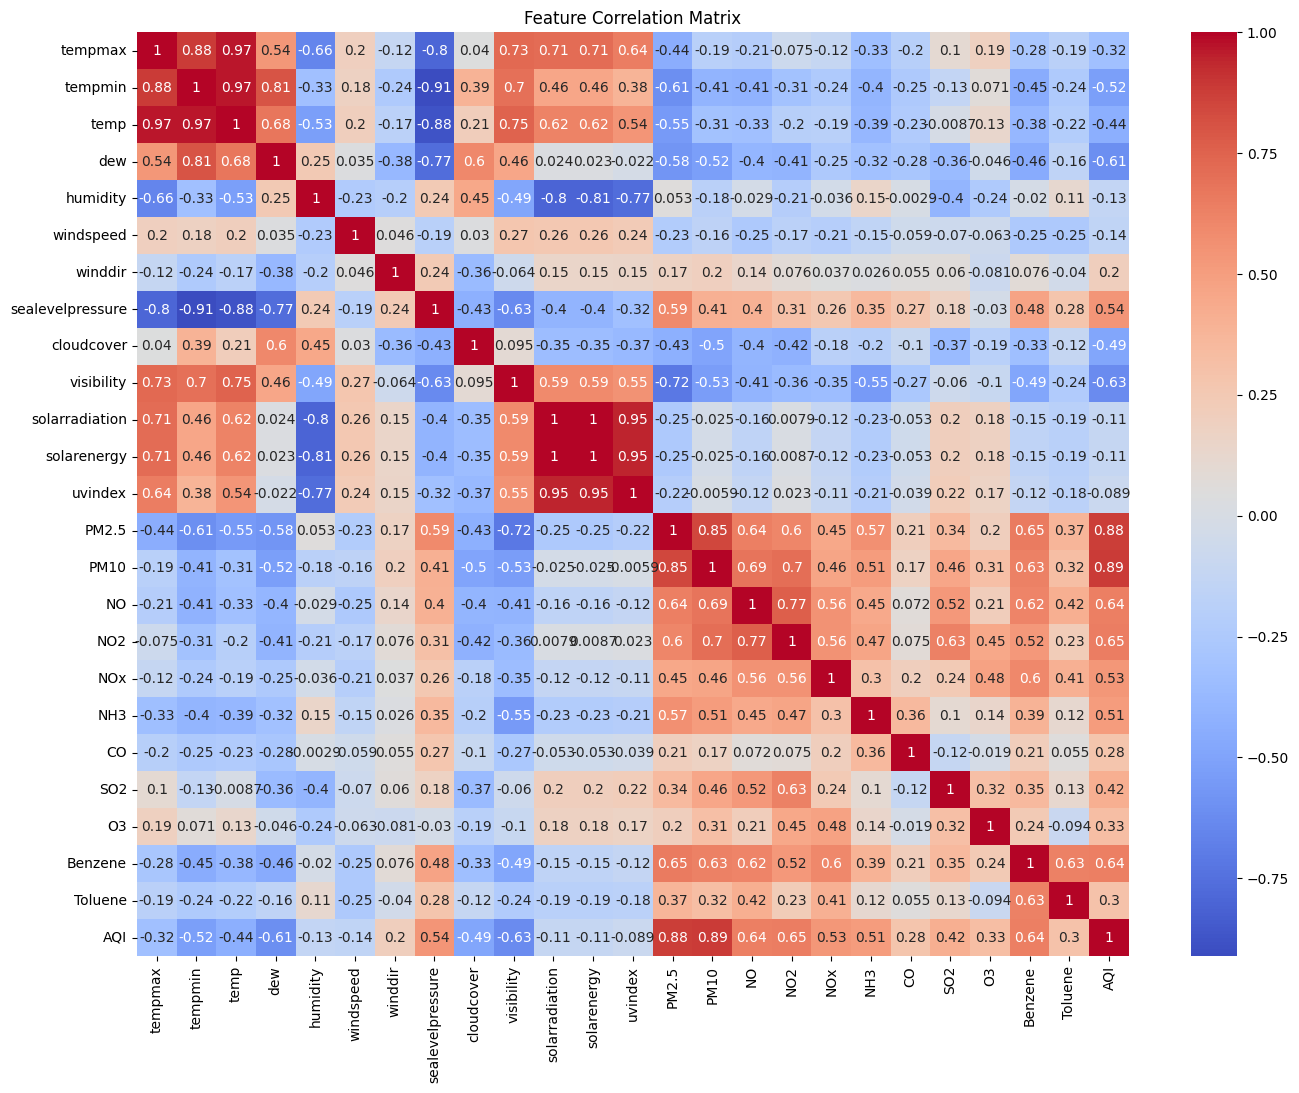

In [21]:
# Correlation matrix
correlation = aqi_data.corr()

import seaborn as sns
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

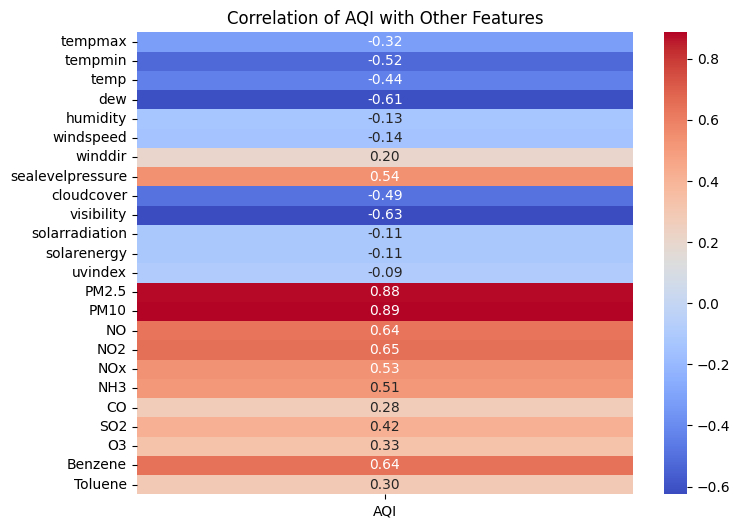

In [22]:
# Correlation with AQI
correlation = aqi_data.corr(numeric_only=True)['AQI'].drop('AQI')

# Plotting Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Customization
plt.title('Correlation of AQI with Other Features')
plt.show()

In [23]:
# Correlation with AQI
correlation = aqi_data.corr(numeric_only=True)['AQI']

# Filtering weak correlations
weak_corr_cols = correlation[(correlation.between(-0.2, 0.2))].index.tolist()

# Display weak correlation columns
print("Columns with weak correlation (-0.2 to 0.2) with AQI:", weak_corr_cols)


Columns with weak correlation (-0.2 to 0.2) with AQI: ['humidity', 'windspeed', 'solarradiation', 'solarenergy', 'uvindex']


In [24]:
aqi_data = aqi_data.drop(columns=weak_corr_cols , axis=1)
aqi_data.head(5)

,tempmax,tempmin,temp,dew,winddir,sealevelpressure,cloudcover,visibility,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
datetime,,,,,,,,,,,,,,,,,,,,
01-01-2015,21.0,9.0,14.4,10.6,10.9,1017.0,58.9,0.7,313.22,607.98,69.16,36.39,110.59,33.85,14.31,10.34,41.68,13.47,24.86,472.0
02-01-2015,15.5,12.0,14.2,12.8,95.6,1018.0,81.4,1.4,186.18,269.55,62.09,32.87,88.14,31.83,8.07,8.17,29.97,10.32,20.09,454.0
03-01-2015,17.0,13.0,14.8,13.5,303.9,1017.3,92.9,0.9,87.18,131.90,25.73,30.31,47.95,69.55,7.84,2.30,19.71,3.67,10.23,143.0
04-01-2015,18.0,10.0,13.8,10.9,296.7,1019.2,46.5,0.8,151.84,241.84,25.01,36.91,48.62,130.36,9.64,5.19,25.36,4.28,9.71,319.0
05-01-2015,20.5,8.0,13.1,8.5,288.5,1016.3,12.7,1.6,146.60,219.13,14.01,34.92,38.25,122.88,6.69,3.71,23.20,3.08,6.21,325.0


## Fill Missing Values

### most values are less than 20.05 , so filling by mean 

In [35]:
aqi_data["SO2"].describe()

count    1927.000000
mean       16.031966
std         7.929740
min         2.300000
25%        10.430000
50%        15.110000
75%        19.680000
max        71.560000
Name: SO2, dtype: float64

In [36]:
aqi_data['SO2'].fillna(aqi_data['SO2'].mean(), inplace=True)

/var/folders/42/94lj0cp519ncj7_m79j3_h3m0000gn/T/ipykernel_1220/2066891640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aqi_data['SO2'].fillna(aqi_data['SO2'].mean(), inplace=True)


### most values are less than 61.28 , so filling by mean 

In [32]:
aqi_data["O3"].describe()

count    1843.000000
mean       51.462507
std        26.516850
min         6.940000
25%        33.500000
50%        44.110000
75%        61.285000
max       257.730000
Name: O3, dtype: float64

In [34]:
aqi_data['O3'].fillna(aqi_data['O3'].mean(), inplace=True)

/var/folders/42/94lj0cp519ncj7_m79j3_h3m0000gn/T/ipykernel_1220/4090136886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aqi_data['O3'].fillna(aqi_data['O3'].mean(), inplace=True)


In [39]:
aqi_data["PM10"].describe()

count    1850.000000
mean      237.164038
std       121.815547
min        18.590000
25%       141.962500
50%       220.520000
75%       315.552500
max       796.880000
Name: PM10, dtype: float64

In [41]:
from sklearn.impute import KNNImputer

In [42]:
imputer = KNNImputer(n_neighbors=5)
aqi_data[['PM10']] = imputer.fit_transform(aqi_data[['PM10']])

In [45]:
aqi_data["NO"].isna().sum()

2

### all having less than 10 empty

In [47]:
aqi_data = aqi_data.dropna(subset=["NO" , "NO2" , "NH3" , "AQI"])

## Save the updated data

In [49]:
aqi_data.to_csv('/Users/pandhari/AQI-Prediction-Delhi/data/updated_aqi_data.csv')